- 19개가 아니라 14개이다. 5개 column 추가필요한가? NO

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [34]:
csv_path = "C:/Users/USER/.keras/datasets/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)
df1 = df[5: : 6]
df2 = df1.set_index(pd.to_datetime(df1.pop("Date Time"), format="%d.%m.%Y %H:%M:%S"))


# train, val, test
n = len(df2)
train_df = df2[0:int(n*0.7)]
val_df = df2[int(n*0.7): int(n*0.9)]
test_df = df2[int(n*0.9):]


# Nomalize
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

### window란 무엇인가?


"Window"는 시계열 데이터를 분석하거나 모델링하기 위해 사용되는 작은 구간을 의미합니다. 시계열 데이터는 시간에 따라 변화하는 데이터이기 때문에 전체 시계열을 한 번에 처리하기보다는 작은 윈도우 또는 구간으로 나누어서 분석하는 것이 일반적입니다.

윈도우를 사용하면 데이터의 지역적인 패턴이나 특징을 더 잘 파악할 수 있습니다. 일반적으로 윈도우는 연속적인 시간 스텝으로 구성되며, 고정된 길이를 가지고 있습니다. 윈도우의 크기는 주어진 문제에 따라 선택될 수 있으며, 작은 윈도우는 짧은 시간 동안의 패턴을 분석할 수 있고, 큰 윈도우는 더 긴 시간 동안의 추세나 주기성을 파악할 수 있습니다.

시계열 데이터 분석에서 윈도우는 데이터를 일정한 길이로 자르는 작업을 의미하기도 합니다. 이렇게 자른 데이터는 각각 독립적인 시계열로 취급되어 분석이나 모델링에 활용됩니다.

### time step이란 무엇인가?

"time step"은 시계열 데이터에서 인접한 두 관측값 사이의 간격을 나타내는 개념입니다. 시계열 데이터는 일정한 시간 간격으로 측정된 데이터이기 때문에 각 관측값은 이전 관측값과 일정한 시간 간격을 가지고 있습니다. 이 시간 간격을 "time step"이라고 합니다.

예를 들어, 1분 간격으로 측정된 온도 데이터가 있다고 가정해보겠습니다. 이 경우 각 관측값 사이의 시간 간격은 1분이며, 이러한 시간 간격이 time step이 됩니다. 다른 예로, 매일 측정된 주식 가격 데이터가 있다면 각 관측값 사이의 시간 간격은 1일이 될 것입니다.

time step은 시계열 데이터를 분석하거나 모델링할 때 중요한 개념입니다. 시계열 데이터의 패턴이나 추세를 파악하거나 미래 값을 예측하기 위해서는 time step을 고려하여 데이터를 분석하고 모델에 적용해야 합니다.

- window: 시계열을 자르는 기간의 길이
> 
- timestep: 

[시계열 window 데이터셋](https://techblog-history-younghunjo1.tistory.com/373)
- tf.Dataset 객체로 만들기 위해서는 Numpy array형태로 넣어줘야 한다.
- datetime을 정수로 바꿔서 tf.Dataset에 넣어줄 것이다.
> 그래야, tf.Dataset 객체로 만든 뒤, 어떻게 Window Dataset이 구성되었는지 날짜로 확인할 수 있기 때문이다. 
- TensorSliceDataset(drop_remainder: bool)
> window_size=2이고 data가 9개 있을 때, 2개, 2개, 2개, 2개, 1개 data가 담긴 window가 생성된다. 여기서, window size가 1인 마지막 window를 drop할지 말지를 `drop_remainder`로 정한다.
- single step은 시간적인 특성을 파악할 수 없다.
> 데이터를 하나씩 넣기 때문 

In [36]:
label_columns =  "T (degC)"
input_width=6 # 입력 window의 크기
label_width=1 # label window의 크기
shift=1

In [38]:
total_window_size = input_width + label_width
total_window_size

7

In [46]:
input_slice = slice(0, input_width)
input_slice

slice(0, 6, None)

In [43]:
np.arange(total_window_size)

array([0, 1, 2, 3, 4, 5, 6])

In [50]:
input_indices = np.arange(total_window_size)[input_slice]
input_indices

array([0, 1, 2, 3, 4, 5])

In [49]:
[i for i in range(10)][input_slice]

[0, 1, 2, 3, 4, 5]

In [53]:
label_start = total_window_size - label_width
label_start

6

In [55]:
labels_slices = slice(label_start, None)
labels_slices

slice(6, None, None)

In [59]:
np.arange(total_window_size)

array([0, 1, 2, 3, 4, 5, 6])

In [61]:
label_indices = np.arange(total_window_size)[labels_slices]
label_indices

array([6])

### window
np.arange(total_window_size)

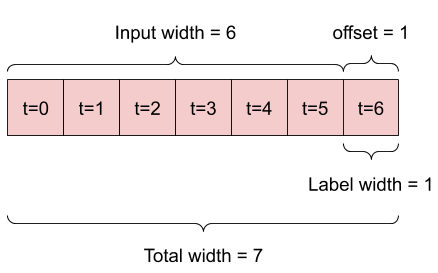

In [62]:
import numpy as np


input_width = 6
label_width = 1
shift = 1

total_window_size = input_width + label_width
print(np.arange(total_window_size))

input_slice = slice(0, input_width)
input_indices = np.arange(total_window_size)[input_slice]
print(input_indices)

label_start = total_window_size - label_width
labels_slices = slice(label_start, None)
label_indices = np.arange(total_window_size)[labels_slices]
print(label_indices)

[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[6]


In [67]:
train_df[: total_window_size]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,-1.266853,-1.263871,0.221831
2009-01-01 02:00:00,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,-1.240790,-1.263871,0.194434
2009-01-01 03:00:00,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,-1.286400,-1.263871,-0.069265
2009-01-01 04:00:00,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,-1.338526,-1.371630,0.761784
2009-01-01 05:00:00,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,-1.143054,-1.156113,-0.185703
2009-01-01 06:00:00,1.091135,-2.169649,-2.239029,-2.182875,1.014416,-1.354835,-1.579503,-0.786272,-1.581113,-1.583635,2.459016,-1.371105,-1.319906,-0.311273
2009-01-01 07:00:00,1.165857,-2.111879,-2.186305,-2.108294,1.026496,-1.340539,-1.550988,-0.784197,-1.554908,-1.557814,2.416777,-0.048411,-0.294044,2.003791


In [70]:
train_df[100: 100 + total_window_size]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-05 05:00:00,-0.371962,-1.256877,-1.222380,-1.154516,0.742600,-1.039035,-1.099495,-0.699095,-1.094449,-1.095378,1.117876,0.779088,0.835266,0.984387
2009-01-05 06:00:00,-0.323755,-1.255721,-1.225819,-1.158819,0.724479,-1.037735,-1.101871,-0.694943,-1.098193,-1.097726,1.129351,-0.204788,0.029232,1.062012
2009-01-05 07:00:00,-0.224929,-1.292695,-1.269373,-1.207584,0.718439,-1.054630,-1.130386,-0.697019,-1.124398,-1.128242,1.193076,-0.569669,-0.294044,2.090549
2009-01-05 08:00:00,-0.118873,-1.366641,-1.351897,-1.286468,0.748640,-1.085820,-1.175536,-0.709473,-1.173064,-1.172842,1.296353,-0.367682,-0.026803,-1.976567
2009-01-05 09:00:00,-0.028484,-1.411702,-1.403474,-1.283599,0.917770,-1.105314,-1.173159,-0.740608,-1.169321,-1.172842,1.364716,-0.354650,0.460266,0.164753
2009-01-05 10:00:00,0.069136,-1.432499,-1.430982,-1.312284,0.905689,-1.113111,-1.189793,-0.738532,-1.188038,-1.189274,1.411838,0.244798,0.460266,-1.900426
2009-01-05 11:00:00,0.158320,-1.460229,-1.465367,-1.392602,0.772802,-1.124807,-1.232566,-0.719851,-1.229218,-1.233874,1.464819,1.893279,1.861128,-1.821088


In [71]:
train_df[200: 200 + total_window_size]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-09 09:00:00,1.767245,-2.921820,-3.032175,-3.219839,0.658035,-1.512085,-1.869409,-0.782121,-1.865623,-1.872364,3.475186,-0.719531,-0.457837,-0.270178
2009-01-09 10:00:00,1.831120,-2.812056,-2.927874,-3.077848,0.682196,-1.493891,-1.838518,-0.780045,-1.835675,-1.841848,3.368979,-0.817267,-0.781113,-0.342095
2009-01-09 11:00:00,1.833531,-2.541691,-2.660818,-2.790998,0.549309,-1.441907,-1.767229,-0.759289,-1.768291,-1.773773,3.068181,-0.856362,-0.996630,0.422744
2009-01-09 12:00:00,1.761219,-2.262082,-2.377715,-2.558649,0.241251,-1.378227,-1.703070,-0.715700,-1.704650,-1.708046,2.743456,-0.810752,-0.673354,-0.201684
2009-01-09 13:00:00,1.703370,-1.795297,-1.911226,-2.314826,-0.548827,-1.245669,-1.624653,-0.570403,-1.629779,-1.632930,2.232441,-0.960614,-0.832837,0.451282
2009-01-09 14:00:00,1.629854,-1.619675,-1.731278,-2.276102,-0.913664,-1.184589,-1.610395,-0.485301,-1.614805,-1.618846,2.031257,-0.732563,-0.673354,0.329137
2009-01-09 15:00:00,1.622623,-1.478715,-1.591446,-2.134111,-0.961986,-1.131305,-1.560493,-0.443788,-1.566138,-1.569551,1.883056,-0.719531,-0.832837,0.375940


- [tf stack](https://www.tensorflow.org/api_docs/python/tf/stack)

In [78]:
tf.stack([np.array(train_df[:total_window_size]), 
    np.array(train_df[100: 100 + total_window_size]),
    np.array(train_df[200: 200 + total_window_size])])

<tf.Tensor: shape=(3, 7, 14), dtype=float64, numpy=
array([[[ 0.9453076 , -1.98247323, -2.04188844, -1.91897277,
          1.11710152, -1.30285119, -1.47732321, -0.79042362,
         -1.48003637, -1.48269721,  2.21852381, -1.26685324,
         -1.26387137,  0.22183081],
        [ 0.95976985, -2.07837211, -2.13816632, -2.06096373,
          1.04461734, -1.33014257, -1.53435391, -0.7862723 ,
         -1.53618981, -1.53903452,  2.32570755, -1.2407903 ,
         -1.26387137,  0.1944336 ],
        [ 0.98628397, -2.07028426, -2.13243549, -2.04518696,
          1.06273839, -1.32884298, -1.52722507, -0.78834796,
         -1.52870268, -1.53199235,  2.32399847, -1.28640045,
         -1.26387137, -0.0692646 ],
        [ 1.00436178, -2.09801405, -2.16108962, -2.09682003,
          1.00837525, -1.33664052, -1.54623531, -0.78212097,
         -1.5474205 , -1.55311884,  2.35891254, -1.33852634,
         -1.37162996,  0.76178426],
        [ 1.06100558, -2.16502773, -2.23215187, -2.18717792,
          0